In [ ]:
import pandas as pd
from fbprophet import Prophet
import matplotlib.pyplot as plt


In [ ]:
import prometheus_api_client as prom
from prometheus_api_client import Metric, MetricsList, PrometheusConnect
from datetime import datetime

In [ ]:
metric_name = ''

In [ ]:
start_time = datetime.fromtimestamp(1545961622)

end_time = datetime.fromtimestamp(1599514864)
label_config = {}
prom_url = ''
prom_token = ''
prom = PrometheusConnect(url=prom_url,
                         headers={"Authorization": "bearer {}".format(prom_token)},
                         disable_ssl=True)
metric_data = prom.custom_query_range(query=metric_name,
                                      start_time=start_time,
                                      end_time=end_time,
                                      step=5000)

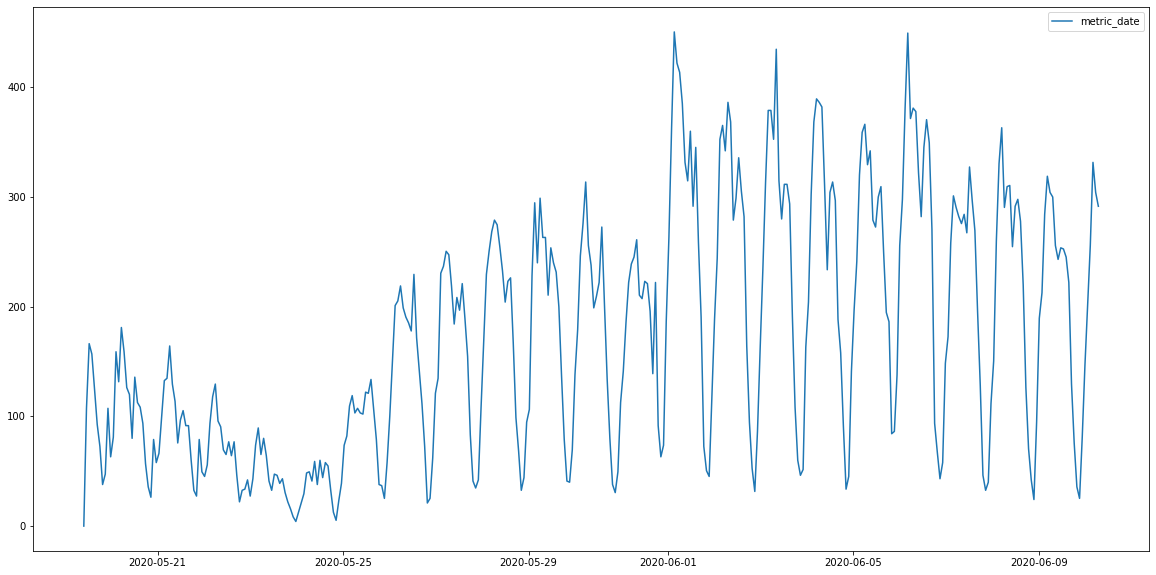

In [ ]:
metrics = MetricsList(metric_data)
metric = metrics[0]
plt.figure(figsize=(20, 10))
plt.plot(metric.metric_values.ds, metric.metric_values.y)
plt.legend(["metric_date"])
plt.show()

In [ ]:
df=metric.metric_values

In [ ]:
# Python
m = Prophet(daily_seasonality=True, weekly_seasonality=True, yearly_seasonality=True)

In [ ]:
df_train=df[:int(0.7*len(df))]

In [ ]:
m.fit(df_train)

In [ ]:
future = m.make_future_dataframe(periods=7*24*2, freq='30min')
# future.tail(100)

In [ ]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper
596,2020-06-10 14:27:02,-8.417645,-65.268800,42.738571
597,2020-06-10 14:57:02,-19.083426,-68.333889,37.234790
598,2020-06-10 15:27:02,-33.327780,-84.678949,22.999910
599,2020-06-10 15:57:02,-50.299426,-103.892769,1.491180
600,2020-06-10 16:27:02,-68.884986,-118.404449,-15.187569


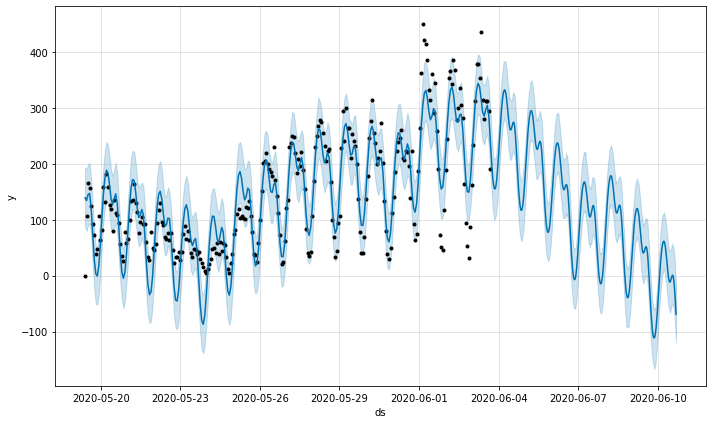

In [ ]:
fig1 = m.plot(forecast)


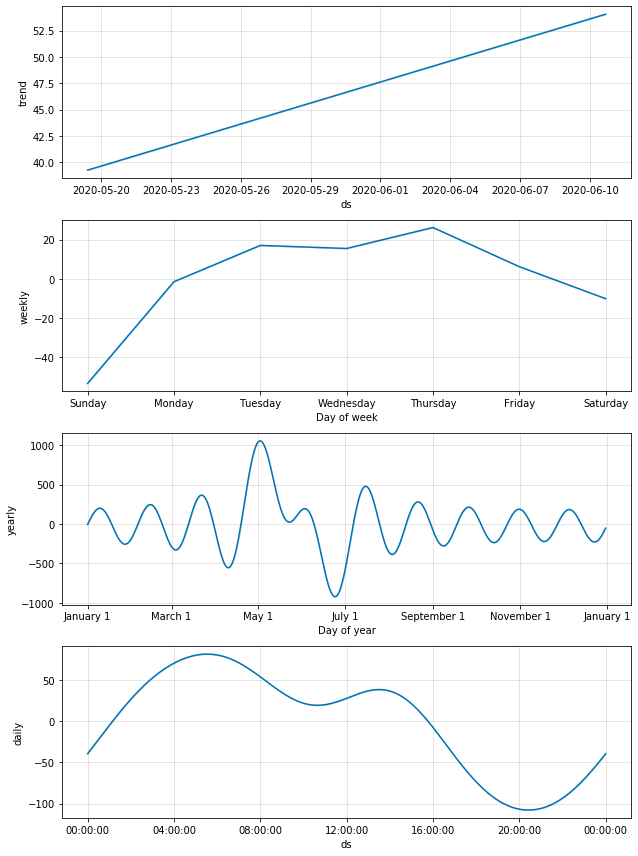

In [ ]:
fig2 = m.plot_components(forecast)


In [ ]:
from fbprophet.plot import plot_plotly
import plotly.offline as py
py.init_notebook_mode()

fig = plot_plotly(m, forecast)  # This returns a plotly Figure
py.iplot(fig)